In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA

In [7]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
dta.index.freq = dta.index.inferred_freq
del dta["YEAR"]

In [149]:
arma_mod30 = ARIMA(dta, order=(7, 0, 0)).fit()

In [150]:
sunspot_activity = dta['SUNACTIVITY'].loc['1900-12-31':'1920-12-31'].values
predict_sunspots_nomod = arma_mod30.predict("1900", "1920", dynamic=True).values

In [151]:
print(arma_mod30.params)
print(arma_mod30.param_names)
print(arma_mod30._results.params)

const      49.286198
ar.L1       1.268946
ar.L2      -0.439068
ar.L3      -0.196771
ar.L4       0.171837
ar.L5      -0.105333
ar.L6      -0.130651
ar.L7       0.227419
sigma2    248.122464
dtype: float64
['const', 'ar.L1', 'ar.L2', 'ar.L3', 'ar.L4', 'ar.L5', 'ar.L6', 'ar.L7', 'sigma2']
[ 4.92861977e+01  1.26894609e+00 -4.39068363e-01 -1.96770984e-01
  1.71836914e-01 -1.05333420e-01 -1.30650644e-01  2.27418759e-01
  2.48122464e+02]


In [152]:
# arma_mod30._results.params[0] = 35
#arma_mod30._results.params[1] = 1.35
arma_mod30._results.params[2] = -0.510
# arma_mod30._results.params[-2] = -8.58299449e-02

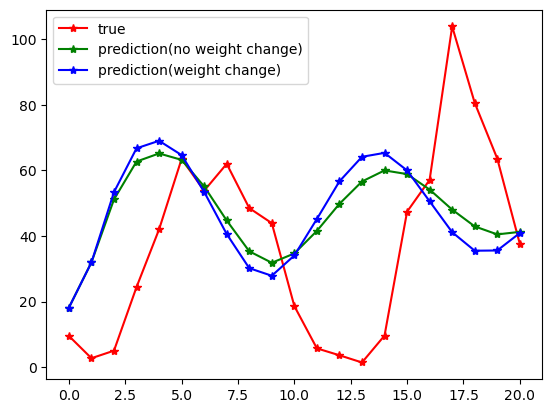

In [153]:
predict_sunspots_mod = arma_mod30.predict("1900", "1920", dynamic=True).values

plt.plot(sunspot_activity,'r*-',label='true')
plt.plot(predict_sunspots_nomod,'g*-',label='prediction(no weight change)')
plt.plot(predict_sunspots_mod,'b*-',label='prediction(weight change)')
plt.legend()
plt.show()